In [2]:
from root_pandas import read_root
import pandas as pd
from matplotlib.pyplot import *
from numpy import *

pd.set_option('display.max_columns', None)
rcParams["figure.figsize"] = (8,5)

/bin/bash: /home/jjpereirab/miniconda/envs/root_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Welcome to JupyROOT 6.24/06


Momentum function

In [4]:
Pi_m = 139.57039 # MeV
K_m  = 493.677   # MeV

def momentum(data, hadron):
    p2 = getattr(data, hadron + "_PX")**2 + getattr(data, hadron + "_PY")**2 + getattr(data, hadron + "_PZ")**2
    p = sqrt(p2)
    return p

Preselection for all kaons

In [7]:
prob_ka = 0.5
prob_pi = 0.5

preselection_Muon1 = "H1_isMuon == 0 & H2_isMuon == 0 & H3_isMuon == 0"
preselection_Pion1 = "H1_ProbPi < {0} & H2_ProbPi < {0} & H3_ProbPi < {0}".format(prob_pi)
preselection_Kaon1 = "H1_ProbK > {0} & H2_ProbK > {0} & H3_ProbK > {0}".format(prob_ka)

preselection_kaons = preselection_Muon1 + " & " + preselection_Pion1 + " & " + preselection_Kaon1

--------------


# Magnet up only

In [4]:
magnetUp = read_root("Data/B2HHH_MagnetUp.root")

In [22]:
magnetUp_kaons = magnetUp.query(preselection_kaons)
magnetUp_kaons.shape[0]

9717

Text(0.5, 0.98, 'kaons momentum')

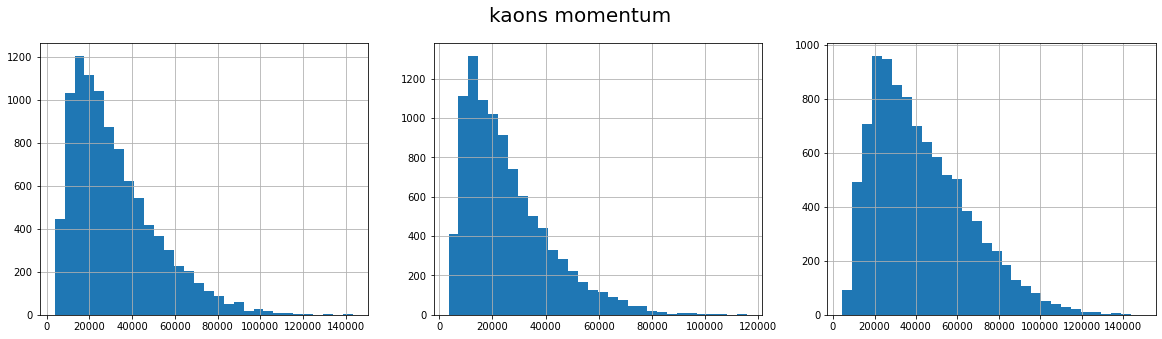

In [26]:
nbin = 30
p1, p2, p3 = (momentum(magnetUp_kaons, "H1"), momentum(magnetUp_kaons, "H2"), momentum(magnetUp_kaons, "H3"))

fig, axs = subplots(1,3, figsize = (20,5))
p1.hist(bins = nbin , ax = axs[0])
p2.hist(bins = nbin , ax = axs[1])
p3.hist(bins = nbin , ax = axs[2])

suptitle("kaons momentum", fontsize = 20)

Text(0.5, 0.98, 'charges')

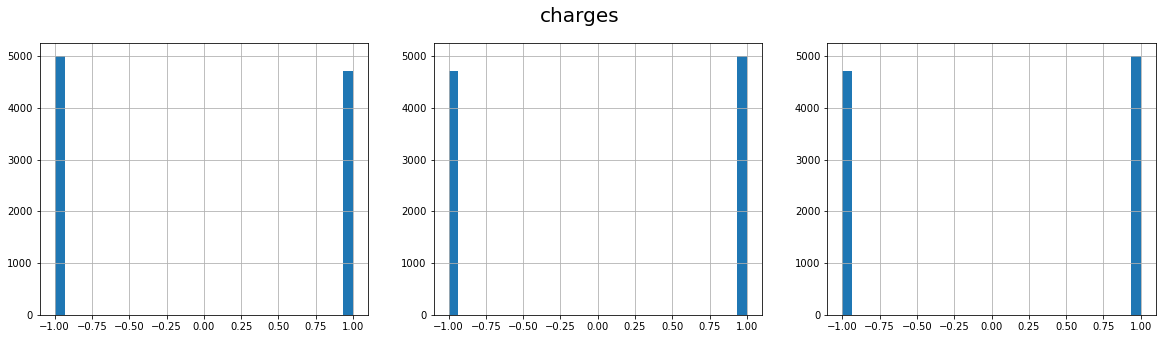

In [51]:
c1up, c2up, c3up = (magnetUp_kaons.H1_Charge, magnetUp_kaons.H2_Charge, magnetUp_kaons.H3_Charge)

fig, axs = subplots(1,3, figsize = (20,5))
c1up.hist(bins = nbin , ax = axs[0])
c2up.hist(bins = nbin , ax = axs[1])
c3up.hist(bins = nbin , ax = axs[2])

suptitle("charges", fontsize = 20)

In [32]:
(c1up + c2up + c3up).value_counts()

 1    5002
-1    4715
dtype: int64

In [42]:
magnetUp_kaons[(c1up + c2up + c3up) == 1]

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
325,10.428140,4.056947,-4168.055539,-704.953919,24548.766576,0.771199,0.051726,-1,1002.657075,0,-3393.636093,-706.874508,19358.787446,0.917991,0.038719,1,714.174519,0,-8864.962492,-7428.640292,77446.175923,0.934580,0.128720,1,536.585115,0
539,33.591307,2.220242,1295.910334,-61.956920,35569.606902,0.932006,0.058690,-1,6672.092707,0,613.484785,464.017357,17701.755537,0.515930,0.043657,1,737.219732,0,-341.750434,3317.423370,24380.200353,0.968883,0.129317,1,23332.453390,0
588,16.531858,11.593388,1493.048615,1944.600925,33003.915368,0.953512,0.104768,-1,1731.923563,0,373.613994,843.614548,30062.084752,0.868579,0.039157,1,499.998835,0,4779.029220,-287.829864,53908.496894,0.844950,0.064803,1,3484.193030,0
1086,4.102797,11.321708,-236.694032,843.809179,28207.109021,0.655129,0.045339,-1,5.033764,0,-561.905858,-189.352668,30100.030163,0.601544,0.040908,1,6.588705,0,-1085.332141,-3076.759324,30036.196827,0.912293,0.080841,1,489.046805,0
1236,3.509346,5.739399,123.873807,856.290459,51956.566616,0.940484,0.078221,-1,7.005894,0,110.753386,1070.975864,24974.211721,0.920603,0.041739,1,2.090424,0,1639.997962,2660.275891,19441.349314,0.702135,0.028641,1,888.535134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417173,8.057556,9.598444,-2375.956014,-377.782055,24004.131032,0.794074,0.101481,-1,498.587449,0,347.536621,658.019595,30277.286382,0.802634,0.057235,1,38.605699,0,-3680.423744,-562.694276,34704.886781,0.942860,0.093964,1,695.976325,0
3417500,11.229602,1.274428,1692.069768,2217.627656,36592.444622,0.960579,0.088691,-1,1152.551144,0,67.698492,688.703988,13876.935598,0.587934,0.039465,1,4.787765,0,-1858.997014,264.676787,10877.201255,0.743666,0.107632,1,13646.438903,0
3418607,21.122374,0.093512,657.258601,-1715.773444,27131.798786,0.919035,0.045284,-1,845.711081,0,844.781179,1243.053863,61949.591422,0.932659,0.129874,1,531.477877,0,558.410966,-1785.837461,24237.102524,0.935549,0.059919,1,811.458646,0
3418621,10.086018,2.420546,-66.223341,-1333.016070,11125.037068,0.756870,0.066929,-1,692.978522,0,108.853028,-2101.048058,10413.398798,0.785972,0.023072,1,2051.954967,0,-5721.599350,-4071.330112,34106.760261,0.940539,0.435278,1,2787.511605,0


--------------------

# Magnet Down only

In [14]:
magnetDown = read_root("B2HHH_MagnetDown.root")

In [49]:
magnetDown_kaons = magnetDown.query(preselection_kaons)
magnetDown_kaons.shape[0]

14178

Text(0.5, 0.98, 'kaons')

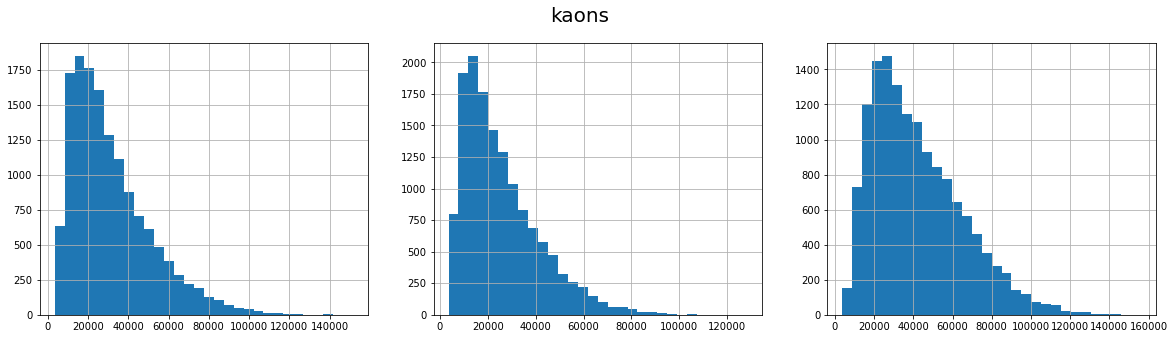

In [16]:
nbin = 30
p1, p2, p3 = (momentum(magnetDown_kaons, "H1"), momentum(magnetDown_kaons, "H2"), momentum(magnetDown_kaons, "H3"))

fig, axs = subplots(1,3, figsize = (20,5))
p1.hist(bins = nbin , ax = axs[0])
p2.hist(bins = nbin , ax = axs[1])
p3.hist(bins = nbin , ax = axs[2])

suptitle("kaons", fontsize = 20)

Text(0.5, 0.98, 'charges')

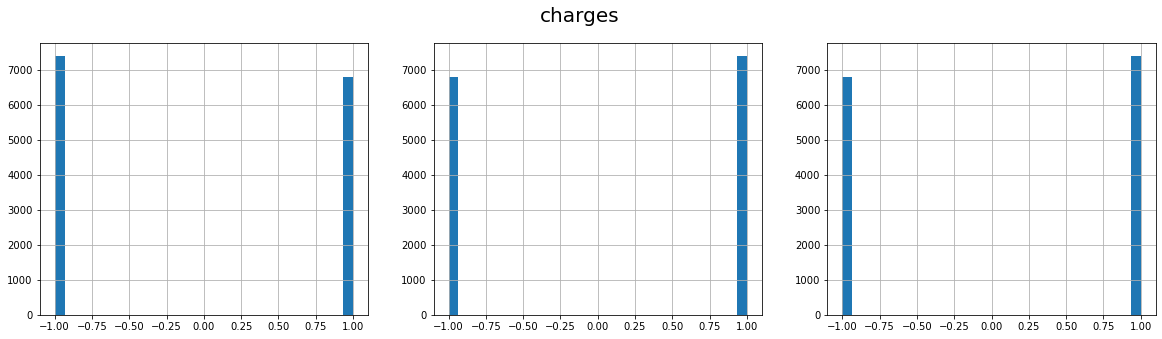

In [52]:
c1Down, c2Down, c3Down = (magnetDown_kaons.H1_Charge, magnetDown_kaons.H2_Charge, magnetDown_kaons.H3_Charge)

fig, axs = subplots(1,3, figsize = (20,5))
c1Down.hist(bins = nbin , ax = axs[0])
c2Down.hist(bins = nbin , ax = axs[1])
c3Down.hist(bins = nbin , ax = axs[2])

suptitle("charges", fontsize = 20)

In [50]:
(c1Down + c2Down + c3Down).value_counts()

 1    7388
-1    6790
dtype: int64

In [46]:
magnetDown_kaons[(c1Down + c2Down + c3Down) == 1]

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
679,6.888037,8.426947,1207.753798,-84.290958,10399.473702,0.902219,0.041574,-1,998.424410,0,-1264.774019,450.600912,48810.547252,0.718900,0.132056,1,110.519068,0,1973.085892,-289.150032,26771.341608,0.915843,0.057261,1,386.493713,0
1751,9.100733,4.113123,-2007.925735,-2555.080382,26601.465958,0.917661,0.077237,-1,1355.611615,0,1693.244621,-2163.746216,14881.492330,0.641197,0.027784,1,8500.518262,0,-1260.859080,-2824.663002,22365.178510,0.947676,0.097263,1,352.235461,0
1894,11.077374,2.360357,1408.170513,-1372.864558,66357.093308,0.785618,0.119467,-1,2.799029,0,-1656.007195,-443.878471,49308.763064,0.741373,0.236373,1,564.019813,0,2171.855775,-1964.419835,92096.742555,0.560237,0.070540,1,44.498271,0
2608,15.875883,1.656760,2336.165388,4166.002188,35728.525679,0.946878,0.060513,-1,3321.946818,0,1000.775461,1342.679910,13504.465985,0.596557,0.054786,1,1942.129052,0,-1708.189185,2517.048779,27592.747481,0.961387,0.125535,1,7027.069112,0
2945,7.960260,9.528332,-1740.175238,1060.634895,76542.224969,0.823950,0.096627,-1,28.678577,0,1428.113248,1586.474470,51984.263573,0.955788,0.126889,1,309.280125,0,-2026.920178,887.978374,47609.309664,0.972340,0.161073,1,193.376446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132979,7.145459,2.532950,352.051358,-932.583303,12349.173813,0.822234,0.028380,-1,277.835240,0,1388.779698,-220.021733,12884.120155,0.768615,0.030723,1,1359.942113,0,-282.939209,2770.523316,14416.358927,0.907275,0.016749,1,4973.477098,0
5133371,7.890939,3.588902,3638.905811,1693.988077,20392.230305,0.799489,0.042025,-1,87.361635,0,1326.127730,-624.313400,7782.038300,0.762142,0.034762,1,3892.777785,0,4259.095847,4696.663666,23262.547452,0.938777,0.060180,1,1561.100661,0
5134452,31.090393,3.318735,-868.888215,-429.546948,28948.157652,0.724375,0.039420,-1,1349.725366,0,-1417.662146,-447.363984,43426.903539,0.767277,0.056467,1,1597.496608,0,-7141.528309,-3904.316253,83336.668525,0.525309,0.129747,1,3879.881760,0
5134870,24.390861,3.469873,-889.296699,431.478857,14038.324617,0.931028,0.055747,-1,7235.701542,0,-2258.701686,635.712238,16611.524319,0.700289,0.037033,1,5225.575761,0,-5104.509597,-3882.280895,39723.621519,0.976290,0.164023,1,17515.181264,0


--------------------

# Both datasets

In [2]:
df = read_root(["B2HHH_MagnetUp.root","B2HHH_MagnetDown.root"])

In [3]:
pd.set_option('display.max_columns', None)
print(df.columns)
df

Index(['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ',
       'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX',
       'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2',
       'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi',
       'H3_Charge', 'H3_IPChi2', 'H3_isMuon'],
      dtype='object')


,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,11.241923,3.870827,1038.634354,4933.332660,164858.932313,0.012529,0.022087,1,16.937403,0,248.779834,248.630719,16906.431769,0.017237,0.878307,-1,10.985674,0,-1946.910223,39.196412,29045.997481,0.009646,0.893131,-1,492.019550,0
1,14.429881,10.294972,-318.157696,-6407.683029,152900.152771,0.066721,0.685733,1,21.398055,0,382.380373,114.052010,6374.152504,0.142381,0.906743,-1,351.338309,0,-1151.694873,-2406.638825,33660.348215,0.946793,0.068788,-1,587.399033,0
2,12.489381,9.303937,-97.802248,199.043666,4381.611081,0.063709,0.867898,1,1.154180,0,208.034060,462.606163,3814.362281,0.011135,0.970704,-1,828.728775,0,627.983171,6277.041303,163852.187436,0.096775,0.534711,-1,3.511918,0
3,9.420983,4.829225,-527.819868,-651.630894,5063.986480,0.006649,0.995989,-1,1559.846172,0,80.115036,-68.143638,2111.592278,0.025256,0.772366,1,3.262061,0,-2269.719699,-3665.766947,107937.151828,0.073778,0.096622,1,6.836508,1
4,7.362626,5.922298,-61.928986,552.828398,27007.961659,0.004962,0.211233,-1,8.178476,0,-787.337582,-1503.071145,15912.287168,0.067723,0.455540,1,495.128111,0,-3236.872273,-94.994283,145404.605206,0.138766,0.709732,1,2.682517,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556113,3.433852,1.182499,2606.910839,-945.534339,37152.290542,0.004434,0.910099,1,144.874028,0,-104.176036,235.840665,3073.274199,0.004660,0.221588,-1,3.354713,0,-1301.063686,918.197448,10593.186009,0.223197,0.021384,-1,527.868740,1
8556114,3.406146,6.125212,2606.910839,-945.534339,37152.290542,0.004434,0.910099,1,144.874028,0,-165.915558,-203.726075,3570.496007,0.022392,0.888709,-1,1.686373,0,-1301.063686,918.197448,10593.186009,0.223197,0.021384,-1,527.868740,1
8556115,3.445290,1.632987,2606.910839,-945.534339,37152.290542,0.004434,0.910099,1,144.874028,0,72.094021,-197.695374,6351.274962,0.013037,0.972349,-1,2.168879,0,-1301.063686,918.197448,10593.186009,0.223197,0.021384,-1,527.868740,1
8556116,14.279479,2.231073,-294.710989,975.489464,35900.130092,0.020866,0.663302,1,131.854764,1,-610.632057,456.396465,7704.706652,0.038897,0.964843,-1,1012.303095,0,-2312.170320,-2195.643507,113890.253747,0.296998,0.028908,-1,225.997621,1


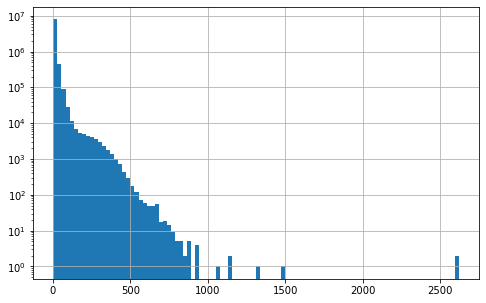

In [4]:
df.B_FlightDistance.hist(bins=100)
yscale("log")

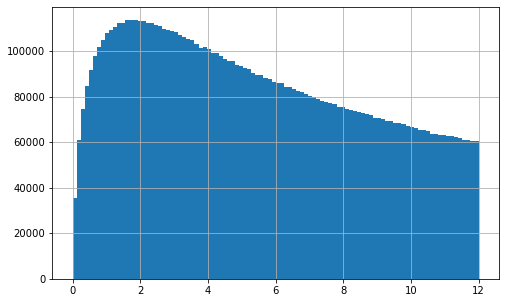

In [5]:
df.B_VertexChi2.hist(bins=100); show()

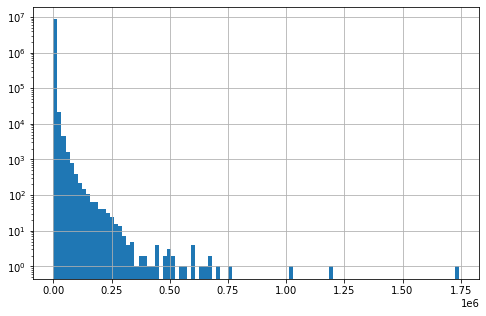

In [6]:
df.H1_IPChi2.hist(bins=100)
yscale("log")

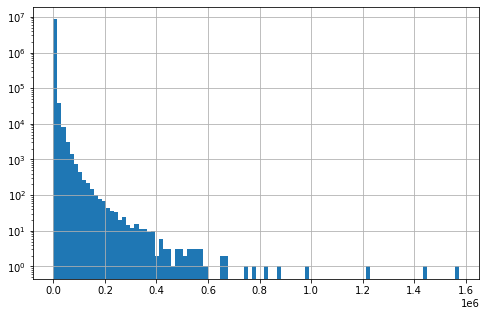

In [7]:
df.H2_IPChi2.hist(bins=100)
yscale("log")

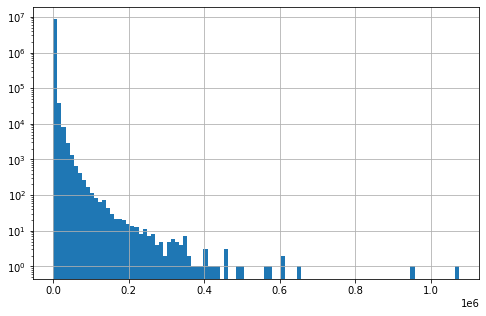

In [8]:
df.H3_IPChi2.hist(bins=100)
yscale("log")

### Momenta

In [20]:
kaons = df.query(preselection_kaons)

Text(0.5, 0.98, 'kaons')

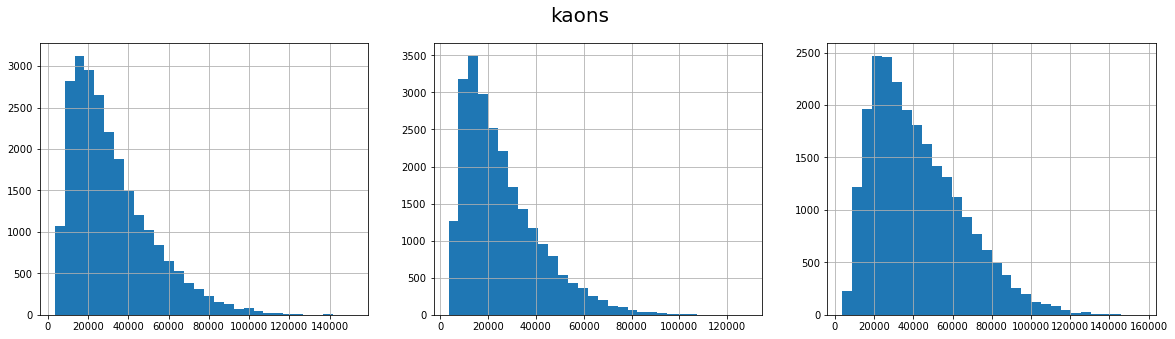

In [49]:
nbin = 30
p1, p2, p3 = (momentum(kaons, "H1"), momentum(kaons, "H2"), momentum(kaons, "H3"))

fig, axs = subplots(1,3, figsize = (20,5))
p1.hist(bins = nbin , ax = axs[0])
p2.hist(bins = nbin , ax = axs[1])
p3.hist(bins = nbin , ax = axs[2])

suptitle("kaons", fontsize = 20)
#axs[0].set_yscale("log")